In [6]:
import os, sys
sys.path.append(os.path.abspath('../utils'))
import analytic_eqs as cases
import numpy as np
import matplotlib.pyplot as plt
import transport_map as tmap
plt.rcParams['figure.dpi'] = 110

In [7]:
Nt = 5*10**2            # Number of time steps to perform the integration of the system
samples = Nt-100        # Number of samples to be considered (remove the transients)
nbins = 50              # Number of bins to disctrize the histogram
nlag = 1                # Time lag to perform the causal analysis

qs = cases.synergistic_collider(Nt)
x = np.array([q[-samples:] for q in qs])

In [8]:
import os, sys
sys.path.append(os.path.abspath('../utils'))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.io import loadmat
import surd as surd
np.random.seed(10)

# Configure matplotlib to use LaTeX for text rendering and set font size
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

SURD CAUSALITY FOR SIGNAL 1
Optimization terminated successfully.
         Current function value: -2.992579
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: -3.025894
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: -0.774738
         Iterations: 37
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: -2.307510
         Iterations: 232
         Function evaluations: 233
         Gradient evaluations: 233
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0122
        (2, 3)      : 0.0010
        (1, 2, 3)   : 0.0080
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
        (3,)        : 0.2162
    Synergystic (S):
        (1, 2)    

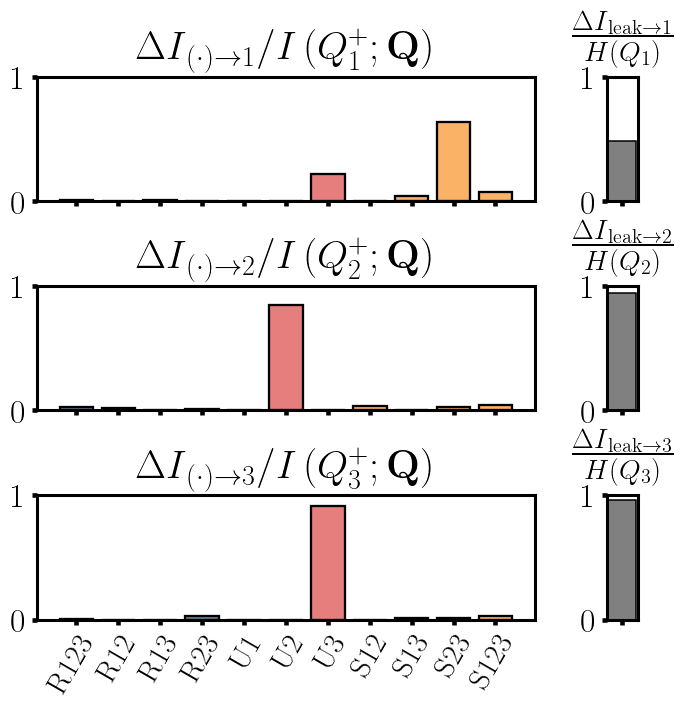

In [9]:
nvars = 3
nlag = 1

information_flux = {}

fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})

for i in range(nvars):
    print(f'SURD CAUSALITY FOR SIGNAL {i+1}')

    # Organize data (0 target variable, 1: agent variables)
    Y = np.vstack([x[i, nlag:], x[:, :-nlag]])

    # Run SURD
    pdf, grids = tmap.transport_map(Y, nbins)
    I_R, I_S, MI, info_leak = surd.surd(pdf)
    
    # Print results
    surd.nice_print(I_R, I_S, MI, info_leak)

    # Plot SURD
    information_flux[i+1] = surd.plot(I_R, I_S, info_leak, axs[i,:], nvars, threshold=-0.01)
    
    # Plot formatting
    axs[i,0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {i+1}}} / I \\left(Q_{i+1}^+ ; \\mathrm{{\\mathbf{{Q}}}} \\right)$', pad=12)
    axs[i,1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {i+1}}}}}{{H \\left(Q_{i+1} \\right)}}$', pad=20)
    axs[i,0].set_xticklabels(axs[i,0].get_xticklabels(), fontsize=20, rotation = 60, ha = 'right', rotation_mode='anchor')
    print('\n')

# Show the results
for i in range(0,nvars-1):
    axs[i,0].set_xticklabels('')

plt.tight_layout(w_pad=-8, h_pad=0)
plt.show()

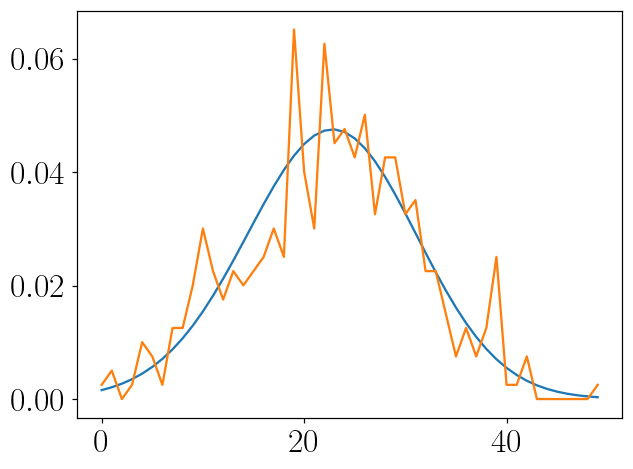

In [10]:
# Compare the marginal distribution for one variable

hist, _ = np.histogramdd(Y.T, nbins)
hist /= hist.sum()

plt.plot(pdf.sum(axis=(0,1,3)))
plt.plot(hist.sum(axis=(0,1,3)))
plt.show()